## NUBE DE PALABRAS

### 0. Instalar paquetes 

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### 1. Cargar librerías

In [4]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import warnings 
import re
import emoji as emoji
from nltk.corpus import stopwords

### 2. Base de datos

In [ ]:
# Base de datos
PAISES_TWEEPY_DISTINCT_ES_DIST = pd.read_csv(r'C:\Users\jilli\Desktop\TFM\2\PAISES_TWEEPY_DISTINCT_ES_DIST.csv')


#### 2.1 Limpieza de datos

In [13]:
# Agregar columna "clean_text" en donde se realizará la limpieza de los tweets
Nube=PAISES_TWEEPY_DISTINCT_ES_DIST
Nube["clean_text"]=Nube["Text"].to_numpy()

In [14]:
#Funciones de limpieza

def removeURLs(str):
    return re.sub(r'https?://\S+','',str)
def strip_emoji(text):
    new_text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return new_text
def remove_user(str):
    return re.sub(r'@\S+','',str)
def punct_re_regex(s):     ##del profesor
    return re.sub(r'[^\w\s]',' ',s)    
def remove_digits(input_text):
    return re.sub('\d+', '', input_text)
def remove_spaces(text):   #remueve espacios
    return re.sub(r' +',' ',text)
def remove_cant_char(str):
    return re.sub(r'\b\w{1,2}\b','',str)

In [15]:
# aplicar funciones de limpieza
Nube['clean_text']=Nube['clean_text'].str.lower()
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: removeURLs(tweet))
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: strip_emoji(tweet))
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: remove_user(tweet))
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: punct_re_regex(tweet))
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: remove_digits(tweet))
Nube['clean_text']=Nube['clean_text'].str.replace("_", "")
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: remove_spaces(tweet))
Nube['clean_text']=Nube['clean_text'].str.strip()

In [16]:
Nube['clean_text']=Nube['clean_text'].str.findall('\w{2,}').str.join(' ')

In [20]:
# conteo de cantidad de palabras
texto2 = " ".join(review for review in Nube.clean_text)
print ("There are {} words in the combination of all review.".format(len(texto2)))

There are 40205428 words in the combination of all review.


In [21]:
# se extraen los stopwords
spanish_stopwords = stopwords.words('spanish')   ##para quitar las stopwords
spanish_stopwords.extend(['así','decir','sé','ir','ud','mierda','ademas','etc','además','pueden','dos','mese','cosa','gran','tan','puede','vez','creo','deben','dia','viru','vo','acá','dice','xq','mese','what','aún','día','hizo','debe','sigue','mismo','pasa','vo','fa','luego','alguien','cada','sino','','User','ma','aquí','mientras','vamo','ahí','sabe','sido','tener','meno','mientra','pue','pues','da','hacen','van','después','tbt','URL','va','mts','x','día','ser','ver','hace','hoy''ahora','solo','toda','at','q','juncal','mas','nunca','cómo','si','sí','hacer','hoy','sólo'])
NubeSinStop = Nube
NubeSinStop['clean_text'] = NubeSinStop['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords)]))

In [36]:
# se filtra un usuario porque escribe siempre lo mismo (propaganda)
NubeSinStop= NubeSinStop[NubeSinStop.Tweet_User!='colorsonline1']
NubeSinStop[1:2]

,Tweet_Id,Tweet_User_Id,Tweet_User,Text,Retweets,Favorites,Replies,Datetime,hashtags,Pais,Tweet_Source,lang,clean_text
1,1300264361466920960,85148912,jocaritomb,"Día 166 #cuarentena ... Ya sé que se acabó, qu...",0,0,0,2020-08-31 02:49:16+00:00,#cuarentena,Col,Instagram,es,cuarentena acabó puedo salir prefiero seguir a...


### 3. Nube de palabras

#### 3.1 Mapa de Perú

In [37]:
# Se filtran los tweets de Perú
NubeSinStop_Peru= NubeSinStop[NubeSinStop.Pais=='Per']

In [38]:
# palabras que serán utilizadas
texto2 = " ".join(review for review in NubeSinStop_Peru.clean_text)
print ("There are {} words in the combination of all review.".format(len(texto2)))

There are 5359829 words in the combination of all review.


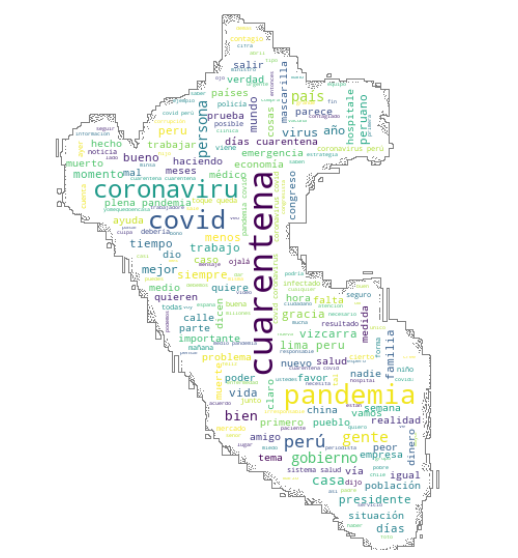

In [31]:
# Se carga imagen en color blanco y negro que se utilizará para 
mask = np.array(Image.open("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/peru.jpg"))
# Se crea la nube de palabras en imagen con 1000 palabras
wc = WordCloud(background_color="white", max_words=1000, mask=mask, contour_width=0.001, contour_color='gray')
# Se genera contenido nube de palabras
wc.generate(texto2)
# Se almacena
wc.to_file("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/Word_Peru.png")
# Se muestra
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3.2 Mapa de Colombia

Se replica el mismo procedimiento del mapa del Perú en Colombia y el resto de países

There are 8874615 words in the combination of all review.


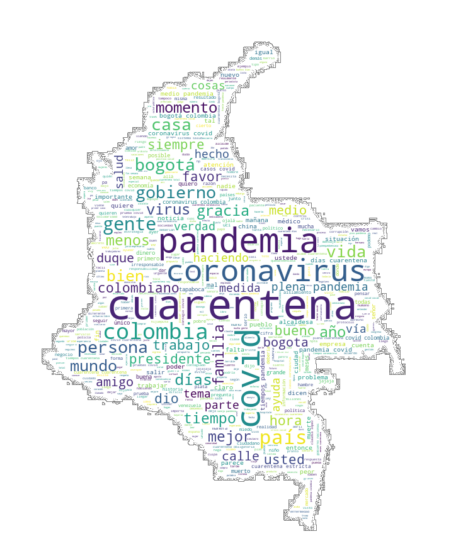

In [56]:
NubeSinStop= NubeSinStop[NubeSinStop.Tweet_User!='colorsonline1']
NubeSinStop_Col= NubeSinStop[NubeSinStop.Pais=='Col']
texto2 = " ".join(review for review in NubeSinStop_Col.clean_text)
print ("There are {} words in the combination of all review.".format(len(texto2)))
mask = np.array(Image.open("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/colombia.png"))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,contour_width=0.001, contour_color='gray')
wc.generate(texto2)
wc.to_file("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/Word_Colombia.png")
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3.2 Mapa de Argentina

There are 8874615 words in the combination of all review.


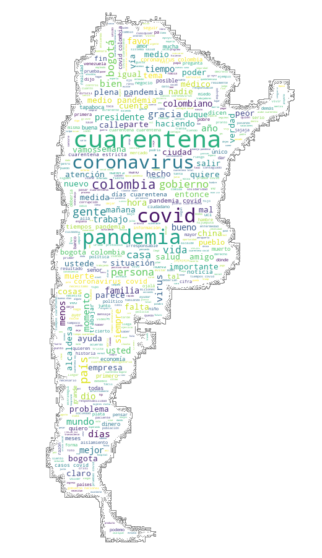

In [45]:
NubeSinStop= NubeSinStop[NubeSinStop.Tweet_User!='colorsonline1']
NubeSinStop_Col= NubeSinStop[NubeSinStop.Pais=='Col']
texto2 = " ".join(review for review in NubeSinStop_Col.clean_text)
print ("There are {} words in the combination of all review.".format(len(texto2)))
mask = np.array(Image.open("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/argentina.jpg"))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,contour_width=0.001, contour_color='gray')
wc.generate(texto2)
wc.to_file("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/Word_Argentina.png")
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3.2 Mapa de Uruguay

There are 8874615 words in the combination of all review.


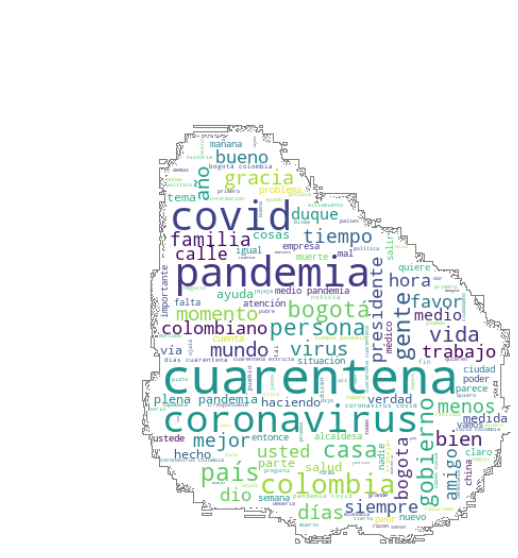

In [44]:
NubeSinStop= NubeSinStop[NubeSinStop.Tweet_User!='colorsonline1']
NubeSinStop_Col= NubeSinStop[NubeSinStop.Pais=='Col']
texto2 = " ".join(review for review in NubeSinStop_Col.clean_text)
print ("There are {} words in the combination of all review.".format(len(texto2)))
mask = np.array(Image.open("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/uruguay.jpg"))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,contour_width=0.001, contour_color='gray')
wc.generate(texto2)
wc.to_file("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/Word_Uruguay.png")
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3.2 Mapa de Chile

There are 8874615 words in the combination of all review.


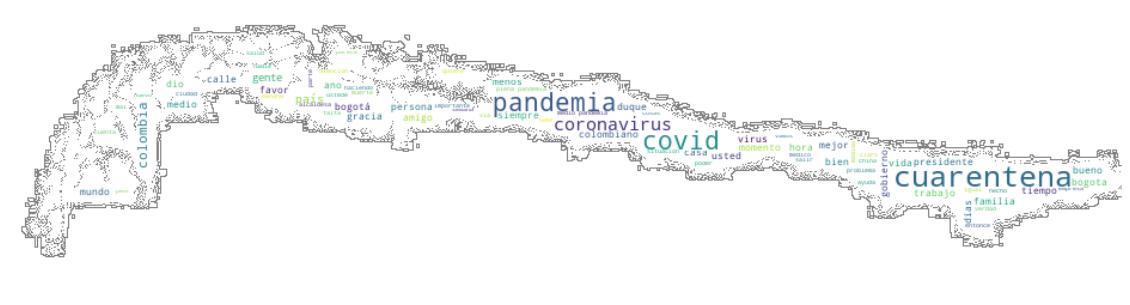

In [48]:
NubeSinStop= NubeSinStop[NubeSinStop.Tweet_User!='colorsonline1']
NubeSinStop_Col= NubeSinStop[NubeSinStop.Pais=='Col']
texto2 = " ".join(review for review in NubeSinStop_Col.clean_text)
print ("There are {} words in the combination of all review.".format(len(texto2)))
mask = np.array(Image.open("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/chile.jpg"))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,contour_width=0.001, contour_color='gray')
wc.generate(texto2)
wc.to_file("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/Word_Chile.png")
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3.2 Mapa de Ecuador

There are 8874615 words in the combination of all review.


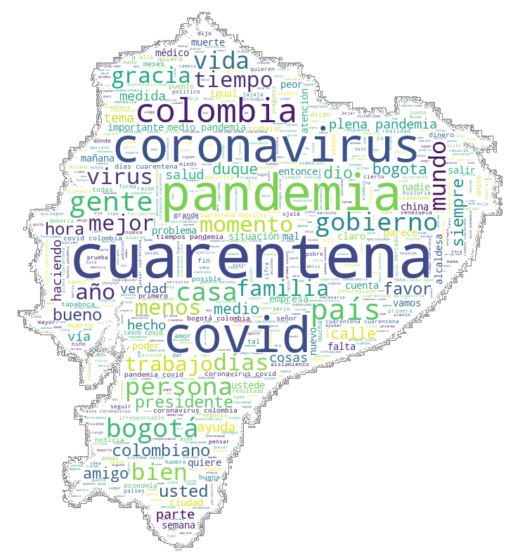

In [52]:
NubeSinStop= NubeSinStop[NubeSinStop.Tweet_User!='colorsonline1']
NubeSinStop_Col= NubeSinStop[NubeSinStop.Pais=='Col']
texto2 = " ".join(review for review in NubeSinStop_Col.clean_text)
print ("There are {} words in the combination of all review.".format(len(texto2)))
mask = np.array(Image.open("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/ecuador.jpg"))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,contour_width=0.001, contour_color='gray')
wc.generate(texto2)
wc.to_file("C:/Users/jilli/Desktop/TFM/2/0_nubedepalabras_envio/Word_Ecuador.png")
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()